<a href="https://colab.research.google.com/github/Manav054/testrepo/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting the drive to make the dataset available.**

In [9]:
from google.colab import files
uploaded = files.upload()

Saving ML_Dataset_CO2Emission.csv.csv to ML_Dataset_CO2Emission.csv.csv


**Fitting dataset in a dataframe and checking its shape.**

In [11]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(io.BytesIO(uploaded['ML_Dataset_CO2Emission.csv.csv']))
print("shape of dataset : " , df.shape)
print("columns : ", df.columns)
df.describe()

shape of dataset :  (1067, 4)
columns :  Index(['Engine_Size', 'Cylinders', 'Fuel_Consumption', 'CO2_Emissions'], dtype='object')


,Engine_Size,Cylinders,Fuel_Consumption,CO2_Emissions
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,256.228679
std,1.415895,1.797447,4.101253,63.372304
min,1.000000,3.000000,4.600000,108.000000
25%,2.000000,4.000000,10.250000,207.000000
50%,3.400000,6.000000,12.600000,251.000000
75%,4.300000,8.000000,15.550000,294.000000
max,8.400000,12.000000,30.200000,488.000000


**visualize the data.**

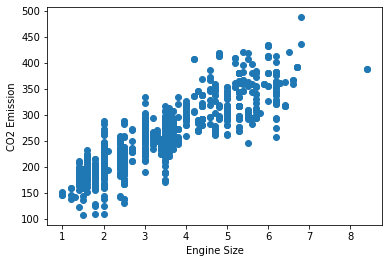

In [16]:
df['Engine_Size'] = df['Engine_Size']
df['CO2_Emissions'] = df['CO2_Emissions']
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.scatter(df.Engine_Size, df.CO2_Emissions)
plt.show()

**Split the Dataset into the training dataset and testing dataset.**

In [18]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df, test_size = 0.2, random_state = 1)
print(training_data.head)
print(testing_data.head)

<bound method NDFrame.head of       Engine_Size  Cylinders  Fuel_Consumption  CO2_Emissions
56            3.0          6              14.6            285
301           6.4          8              16.7            317
992           2.5          4              10.6            218
893           4.8          8              15.9            320
54            4.0          8              15.3            290
...           ...        ...               ...            ...
847           1.6          4               9.3            200
715           2.5          4               8.8            175
905           4.8          8              15.1            292
235           2.4          4              12.2            244
1061          3.2          6              13.0            258

[853 rows x 4 columns]>
<bound method NDFrame.head of      Engine_Size  Cylinders  Fuel_Consumption  CO2_Emissions
133          3.0          6              13.6            274
340          1.4          4              10.0    

**Create the simple linear regression model.**

In [20]:
from sklearn import linear_model

slr = linear_model.LinearRegression()
train_x = np.asanyarray(training_data[['Engine_Size']])
train_y = np.asanyarray(training_data[['CO2_Emissions']])
slr.fit(train_x, train_y)

#Values of Coeffient.
print('X coefficient : ', slr.coef_)
print('Y intercept : ', slr.intercept_)

X coefficient :  [[39.4153746]]
Y intercept :  [124.77059523]


**Plot regression Line.**

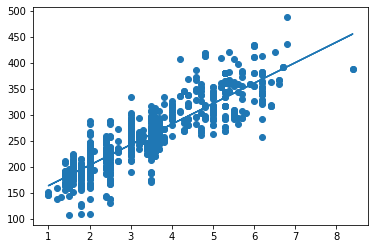

In [25]:
plt.scatter(training_data.Engine_Size, training_data.CO2_Emissions)
plt.plot(training_data.Engine_Size, (124.77059523) + (39.4153746) * (training_data.Engine_Size))
plt.show()

**Evaluate the model.**

In [28]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(testing_data[['Engine_Size']])
test_y = np.asanyarray(testing_data[['CO2_Emissions']])
test_y = slr.predict(test_x)
print(test_y)
r2 = r2_score(testing_data.CO2_Emissions, test_y)
print("R2 Score : ",r2)

[[243.01671902]
 [179.95211967]
 [203.60134443]
 [203.60134443]
 [306.08131838]
 [243.01671902]
 [203.60134443]
 [195.71826951]
 [243.01671902]
 [219.36749427]
 [219.36749427]
 [243.01671902]
 [219.36749427]
 [329.73054314]
 [223.30903173]
 [223.30903173]
 [187.83519459]
 [298.19824346]
 [262.72440632]
 [219.36749427]
 [361.26284282]
 [223.30903173]
 [270.60748124]
 [262.72440632]
 [270.60748124]
 [243.01671902]
 [172.06904475]
 [341.55515552]
 [187.83519459]
 [203.60134443]
 [243.01671902]
 [329.73054314]
 [262.72440632]
 [333.6720806 ]
 [282.43209362]
 [333.6720806 ]
 [369.14591774]
 [183.89365713]
 [290.31516854]
 [254.8413314 ]
 [243.01671902]
 [373.0874552 ]
 [203.60134443]
 [266.66594378]
 [270.60748124]
 [203.60134443]
 [179.95211967]
 [179.95211967]
 [203.60134443]
 [258.78286886]
 [187.83519459]
 [349.43823044]
 [294.256706  ]
 [369.14591774]
 [203.60134443]
 [270.60748124]
 [223.30903173]
 [321.84746822]
 [270.60748124]
 [187.83519459]
 [219.36749427]
 [231.19210664]
 [203.60